In [1]:
# Metrics to be used : 
# Accuracy DONE
# Precision? DONE
# Recall 
# F1-Score DONE
# Confusion Matrix DONE

In [2]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, mean_squared_error
from scipy.stats import pearsonr
import xgboost as xgb
import numpy as np

In [3]:
df = pd.read_csv('C:/Users/nagpa/Desktop/5neophytes/dataset/dataframe_updated.csv')

In [23]:
ada_model = joblib.load('C:/Users/nagpa/Desktop/5neophytes/code/ada_model.pkl')
rfc_model = joblib.load('C:/Users/nagpa/Desktop/5neophytes/code/random_forest.pkl')
xg_model = joblib.load('C:/Users/nagpa/Desktop/5neophytes/code/xgBoost.pkl')
LG_model = joblib.load('C:/Users/nagpa/Desktop/5neophytes/code/linear_regression.pkl')

c:\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator GridSearchCV from version 1.4.2 when using version 1.5.1. This might lead to breaking code or invalid resul

In [24]:
X = df.drop('traffic',axis=1)
#putting target variable in Y
Y = df['traffic']

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
smote = SMOTE(random_state=42)

In [27]:
X_smote, Y_smote = smote.fit_resample(X, Y)

In [28]:
# splitting data into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_smote,Y_smote, train_size = 0.65,random_state=42)

In [29]:
X_train.shape, X_test.shape

((14860, 9), (8003, 9))

In [31]:
y_pred_ada = ada_model.predict(X_test)
y_pred_rfc = rfc_model.predict(X_test)
y_pred_xgb = xg_model.predict(X_test)
y_pred_lg = LG_model.predict(X_test)

c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [44]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "MSE": [],
    "RMSE": [],
    "Pearson's Correlation": []
}

In [45]:
for model_name, y_pred in [("ada", y_pred_ada), ("rfc", y_pred_rfc)]:
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy_score(Y_test, y_pred))
    metrics["Precision"].append(precision_score(Y_test, y_pred, average='weighted'))
    metrics["Recall"].append(recall_score(Y_test, y_pred, average='weighted'))
    metrics["F1 Score"].append(f1_score(Y_test, y_pred, average='weighted'))
    metrics["MSE"].append(mean_squared_error(Y_test, y_pred))
    metrics["RMSE"].append(np.sqrt(mean_squared_error(Y_test, y_pred)))
    metrics["Pearson's Correlation"].append(pearsonr(Y_test, y_pred))


In [46]:
for model_name, y_pred in [("xgb", y_pred_xgb)]:
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy_score(Y_test -1, y_pred))
    metrics["Precision"].append(precision_score(Y_test -1, y_pred, average='weighted'))
    metrics["Recall"].append(recall_score(Y_test -1 , y_pred, average='weighted'))
    metrics["F1 Score"].append(f1_score(Y_test -1 , y_pred, average='weighted'))
    metrics["MSE"].append(mean_squared_error(Y_test-1, y_pred))
    metrics["RMSE"].append(np.sqrt(mean_squared_error(Y_test-1, y_pred)))
    metrics["Pearson's Correlation"].append(pearsonr(Y_test-1, y_pred))


In [47]:
metrics_df = pd.DataFrame(metrics)

In [ ]:
import matplotlib.pyplot as plt

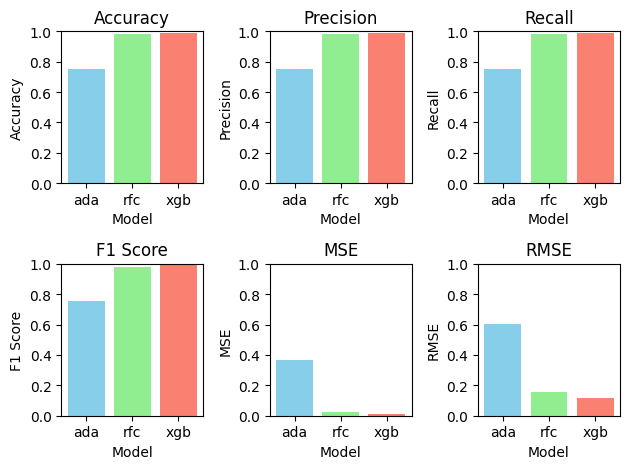

<Figure size 2000x1500 with 0 Axes>

In [ ]:
metrics_list = ["Accuracy", "Precision", "Recall", "F1 Score","MSE","RMSE"]

for i, metric in enumerate(metrics_list):
    plt.subplot(2, 3, i + 1)  # Adjusted to 2 rows and 2 columns
    plt.bar(metrics_df["Model"], metrics_df[metric], color=['skyblue', 'lightgreen', 'salmon'])
    plt.title(metric)
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for better comparison

plt.tight_layout()
plt.figure(figsize=(20, 15))
plt.show()

In [ ]:
print(metrics)

{'Model': ['ada', 'rfc', 'xgb'], 'Accuracy': [0.7530925902786455, 0.9813819817568412, 0.9891290765962764], 'Precision': [0.7516455853953273, 0.9813758910894431, 0.9891262794187916], 'Recall': [0.7530925902786455, 0.9813819817568412, 0.9891290765962764], 'F1 Score': [0.7522599785321618, 0.9813779558264919, 0.989126675355098], 'MSE': [0.36423841059602646, 0.024615769086592527, 0.013120079970011246], 'RMSE': [0.6035216736754584, 0.1568941333721326, 0.11454291758992018], "Pearson's Correlation": [PearsonRResult(statistic=0.7256279145337783, pvalue=0.0), PearsonRResult(statistic=0.9814894824919044, pvalue=0.0), PearsonRResult(statistic=0.9901303380919424, pvalue=0.0)]}


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
conf_matrix_ada = confusion_matrix(Y_test, y_pred_ada)
conf_matrix_rfc = confusion_matrix(Y_test, y_pred_rfc)
conf_matrix_xgb = confusion_matrix(Y_test - 1,y_pred_xgb)

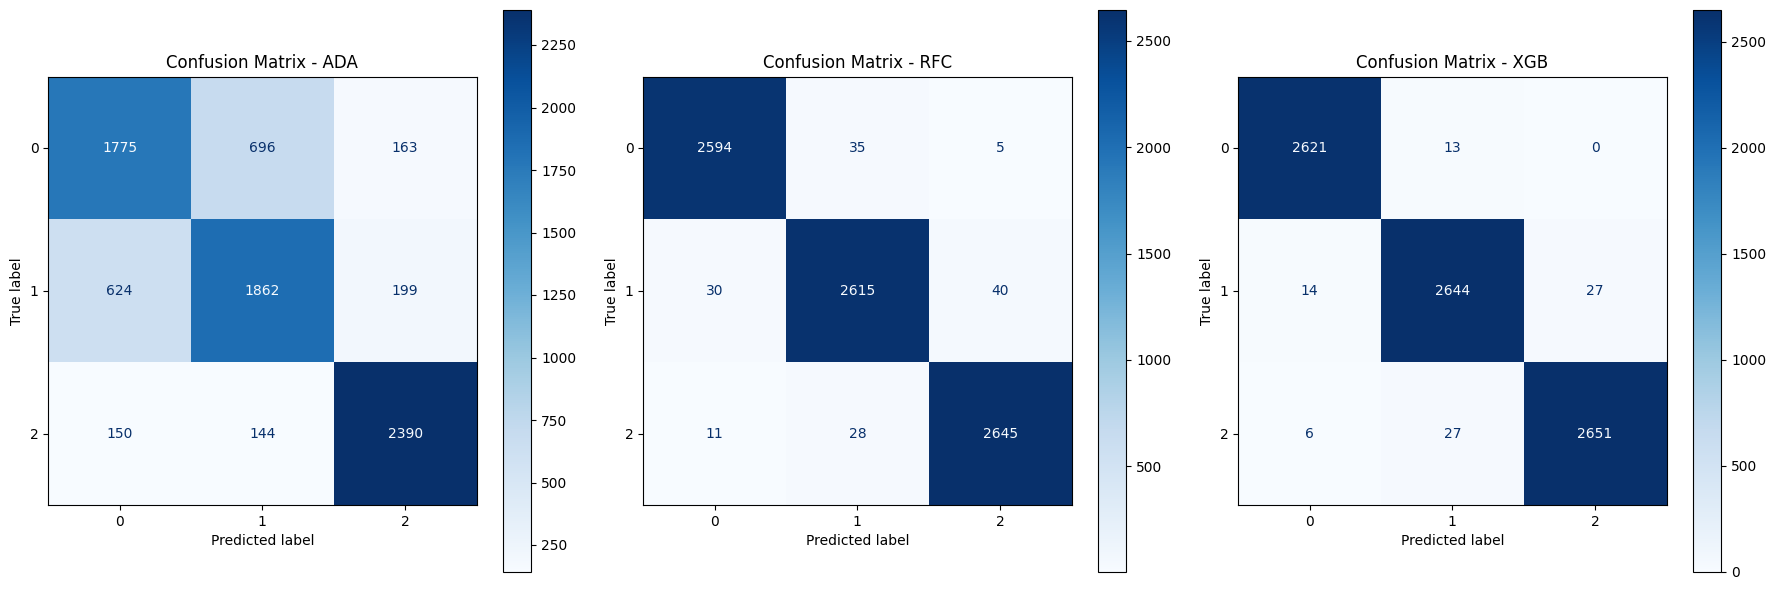

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot confusion matrices
disp_ada = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ada)
disp_rfc = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rfc)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb)

# Plot each confusion matrix
disp_ada.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('Confusion Matrix - ADA')

disp_rfc.plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title('Confusion Matrix - RFC')

disp_xgb.plot(ax=axes[2], cmap=plt.cm.Blues)
axes[2].set_title('Confusion Matrix - XGB')

plt.tight_layout()
plt.show()

In [ ]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,MSE,RMSE,Pearson's Correlation
0,ada,0.753093,0.751646,0.753093,0.752260,0.364238,0.603522,"(0.7256279145337783, 0.0)"
1,rfc,0.981382,0.981376,0.981382,0.981378,0.024616,0.156894,"(0.9814894824919044, 0.0)"
2,xgb,0.989129,0.989126,0.989129,0.989127,0.013120,0.114543,"(0.9901303380919424, 0.0)"
